In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('credit_card_fraud.csv')

In [4]:
df.shape

(8000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                8000 non-null   object 
 1   Transaction Amount                       8000 non-null   float64
 2   Cardholder Name                          8000 non-null   object 
 3   Card Number (Hashed or Encrypted)        8000 non-null   object 
 4   Merchant Name                            8000 non-null   object 
 5   Merchant Category Code (MCC)             8000 non-null   int64  
 6   Transaction Location (City or ZIP Code)  8000 non-null   object 
 7   Transaction Currency                     8000 non-null   object 
 8   Card Type                                8000 non-null   object 
 9   Card Expiration Date                     8000 non-null   object 
 10  CVV Code (Hashed or Encrypted)           8000 no

In [6]:
df['Transaction Date and Time']=pd.to_datetime(df['Transaction Date and Time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Transaction Date and Time                8000 non-null   datetime64[ns]
 1   Transaction Amount                       8000 non-null   float64       
 2   Cardholder Name                          8000 non-null   object        
 3   Card Number (Hashed or Encrypted)        8000 non-null   object        
 4   Merchant Name                            8000 non-null   object        
 5   Merchant Category Code (MCC)             8000 non-null   int64         
 6   Transaction Location (City or ZIP Code)  8000 non-null   object        
 7   Transaction Currency                     8000 non-null   object        
 8   Card Type                                8000 non-null   object        
 9   Card Expiration Date                     

In [8]:
df.isnull().sum()

Transaction Date and Time                     0
Transaction Amount                            0
Cardholder Name                               0
Card Number (Hashed or Encrypted)             0
Merchant Name                                 0
Merchant Category Code (MCC)                  0
Transaction Location (City or ZIP Code)       0
Transaction Currency                          0
Card Type                                     0
Card Expiration Date                          0
CVV Code (Hashed or Encrypted)                0
Transaction Response Code                     0
Transaction ID                                0
Fraud Flag or Label                           0
Previous Transactions                         0
Transaction Source                            0
IP Address                                    0
Device Information                            0
User Account Information                   4010
Transaction Notes                             0
dtype: int64

In [9]:
df.drop(['User Account Information'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

Transaction Date and Time                  0
Transaction Amount                         0
Cardholder Name                            0
Card Number (Hashed or Encrypted)          0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Card Expiration Date                       0
CVV Code (Hashed or Encrypted)             0
Transaction Response Code                  0
Transaction ID                             0
Fraud Flag or Label                        0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
Device Information                         0
Transaction Notes                          0
dtype: int64

In [ ]:
#feature engineering

In [13]:
df['year']=df['Transaction Date and Time'].dt.year
df['month']=df['Transaction Date and Time'].dt.month
df['day']=df['Transaction Date and Time'].dt.day
df['weekday']=df['Transaction Date and Time'].dt.weekday
df['hour']=df['Transaction Date and Time'].dt.hour

In [14]:
df.drop(['Transaction Date and Time'],axis=1,inplace=True)

In [15]:
df

,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),...,Previous Transactions,Transaction Source,IP Address,Device Information,Transaction Notes,year,month,day,weekday,hour
0,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,29-Apr,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,...,None,Online,18.106.240.6,Tablet,Consequatur corporis minima ad vero deserunt n...,2022,9,24,5,13
1,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,26-Mar,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,...,None,Online,212.48.185.128,Mobile,Dolore repellendus odio deleniti. Eaque quibus...,2020,7,24,4,11
2,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,29-Nov,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,...,3 or more,In-Person,17.190.112.46,Mobile,Unde beatae perspiciatis sapiente. Voluptates ...,2023,3,18,5,1
3,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,25-Sep,891d46993a36d78392247c642138cede01d9841daab1d9...,...,2,In-Person,153.136.24.104,Tablet,Cupiditate repellendus necessitatibus quo occa...,2021,1,7,3,21
4,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,31-Mar,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,...,2,Online,196.153.28.131,Desktop,Molestias assumenda consectetur itaque veritat...,2021,12,16,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2214.15,Lakshay Khatri,8a0015c8601fe597e160c31a05fd5e4a87a4b876df426f...,Manda Ltd,1236,Anantapuram,EUR,Visa,26-Apr,d4b9aead1dd10a596542d1d8211a5021b9c3e894751d01...,...,1,Online,214.34.176.247,Mobile,Et maiores quaerat fugiat voluptatibus reprehe...,2020,12,17,3,20
7996,675.97,Dharmajan Salvi,de3530e65ccf6fc0c0eb7f7a7e8e5b71bb907d5207d390...,Bhavsar Group,3406,Guntakal,INR,Visa,25-Nov,d874e4e4a5df21173b0f83e313151f813bea4f488686ef...,...,3 or more,In-Person,34.237.199.33,Tablet,Assumenda maxime provident rem quis consequunt...,2022,7,4,0,5
7997,918.28,Alia Sane,227356d19fd5374e9cfdd134387fe3499683a1c7929981...,"Gole, Yohannan and Singhal",7504,Udupi,USD,MasterCard,24-May,20e9c64c05a54d199610fb7e38135361324b5ed5dcf39c...,...,3 or more,In-Person,220.203.140.160,Tablet,Voluptatibus odit praesentium iste libero ipsa...,2022,8,14,6,19
7998,3035.31,Chirag Rege,669bd9fcc7e40cc25d99c773678e48bcb3fdadf7fee6a9...,Kakar LLC,4015,Sultan Pur Majra,EUR,American Express,24-Sep,e7866fdc6672f827c76f6124ca3eeaff44aff8b7caf4ee...,...,1,In-Person,216.56.133.227,Tablet,Animi excepturi nam distinctio fuga. Vel eius ...,2021,5,16,6,18


In [ ]:
#EDA
#Univariate

C:\Users\shiva\AppData\Local\Temp\ipykernel_45116\1437496168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Transaction Amount'])


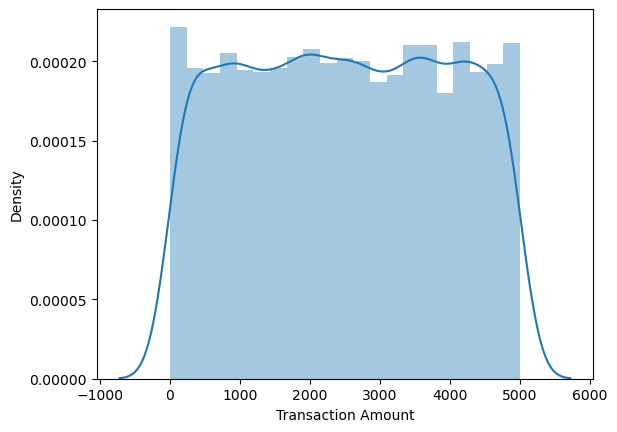

In [17]:
sns.distplot(df['Transaction Amount'])
plt.show()

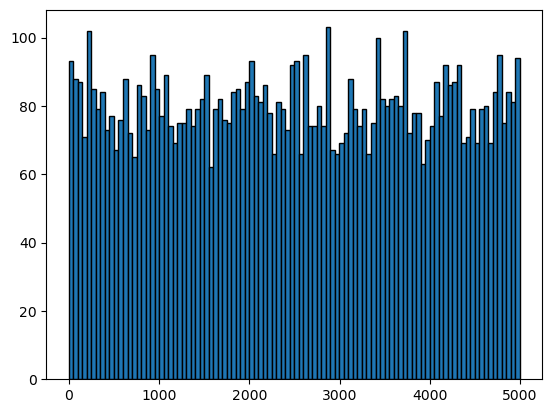

In [18]:
plt.hist(df['Transaction Amount'],edgecolor='black',bins=100)
plt.show()

In [19]:
df.drop(['Cardholder Name'],axis=1,inplace=True)

In [20]:
df.drop(['Card Number (Hashed or Encrypted)','Merchant Name','CVV Code (Hashed or Encrypted)','Transaction Notes'],axis=1,inplace=True)

In [21]:
df.drop(['Transaction ID','Card Expiration Date'],axis=1,inplace=True)

In [23]:
df.drop(['IP Address'],axis=1,inplace=True)

In [24]:
df.drop(['Merchant Category Code (MCC)'],axis=1,inplace=True)

In [25]:
#explore EDA
df_location=df['Transaction Location (City or ZIP Code)'].value_counts()
len(df_location.index)

316

In [27]:
df_location_new=df_location[df_location>30]
df_location_new

Ghaziabad                       53
Aurangabad                      51
Darbhanga                       39
Bettiah                         38
Malda                           37
South Dumdum                    37
Warangal                        36
Nangloi Jat                     36
Belgaum                         36
Bareilly                        36
Mysore                          35
Muzaffarpur                     35
Jammu                           35
Rohtak                          35
Vijayawada                      35
Hapur                           34
Thoothukudi                     34
Vijayanagaram                   34
Bangalore                       34
Panipat                         33
Srikakulam                      33
Sasaram                         33
Junagadh                        33
Anantapur                       33
Meerut                          32
Begusarai                       32
Satara                          32
Bongaigaon                      32
Saharanpur          

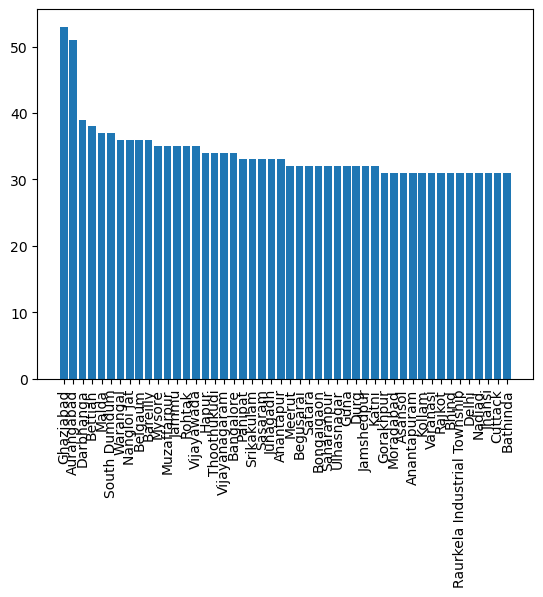

In [28]:
plt.bar(df_location_new.index,df_location_new.values)
plt.xticks(rotation=90)
plt.show()

In [29]:
df['Transaction Currency'].value_counts()

INR    2713
USD    2645
EUR    2642
Name: Transaction Currency, dtype: int64

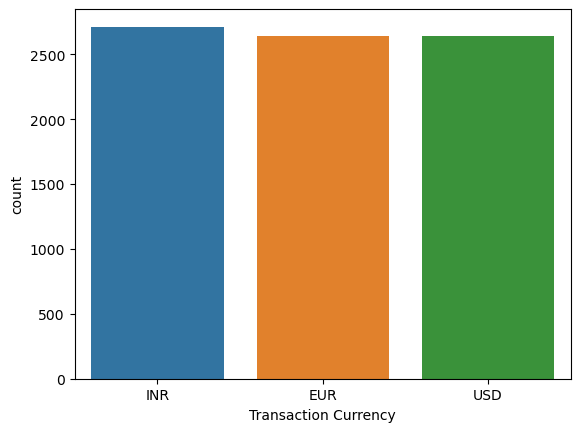

In [30]:
sns.countplot(x=df['Transaction Currency'])
plt.show()

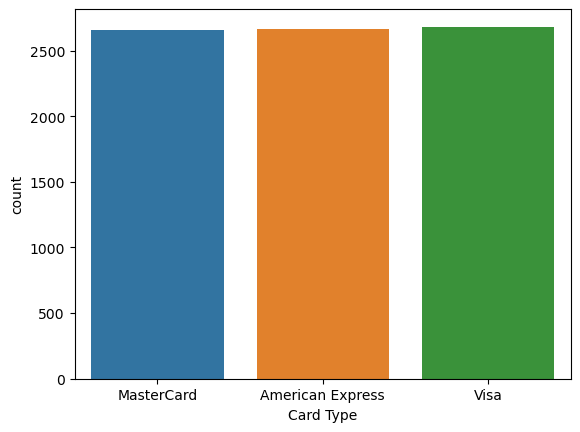

In [31]:
sns.countplot(x=df['Card Type'])
plt.show()

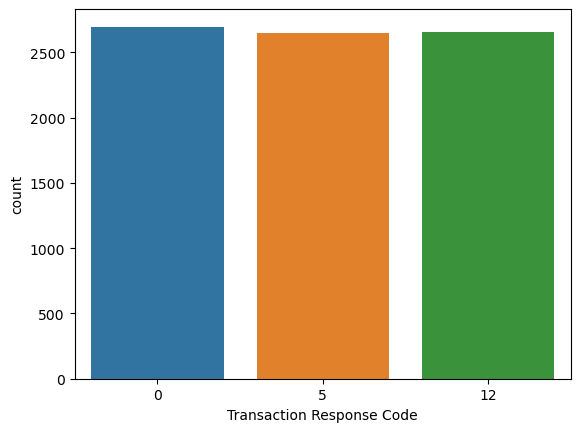

In [32]:
sns.countplot(x=df['Transaction Response Code'])
plt.show()

In [33]:
df['Fraud Flag or Label'].value_counts()

0    4011
1    3989
Name: Fraud Flag or Label, dtype: int64

In [35]:
df['Previous Transactions'].value_counts()

None         2043
1            2031
3 or more    1968
2            1958
Name: Previous Transactions, dtype: int64

In [36]:
df['Previous Transactions'].replace('None',0,inplace=True)
df['Previous Transactions'].replace('3 or more',3,inplace=True)

<Axes: xlabel='Previous Transactions', ylabel='count'>

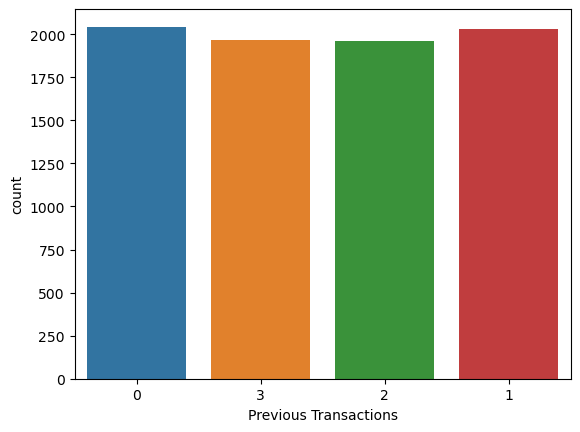

In [37]:
sns.countplot(x=df['Previous Transactions'])

<Axes: xlabel='Transaction Source', ylabel='count'>

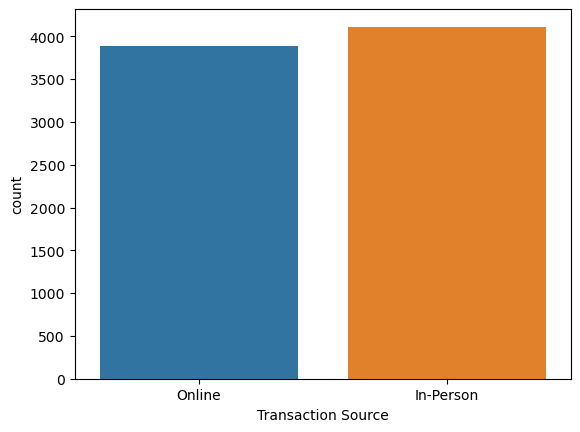

In [38]:
sns.countplot(x=df['Transaction Source'])

In [39]:
df['Transaction Source'].replace('Online',0,inplace=True)
df['Transaction Source'].replace('In-Person',1,inplace=True)

<Axes: xlabel='Device Information', ylabel='count'>

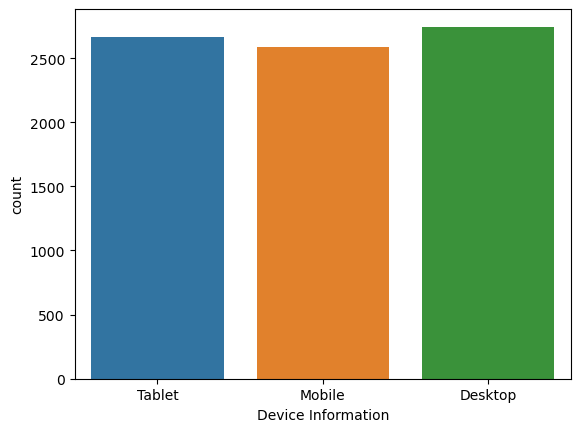

In [40]:
sns.countplot(x=df['Device Information'])

In [41]:
df['year'].value_counts()

2021    2137
2022    2134
2020    2114
2023    1615
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='count'>

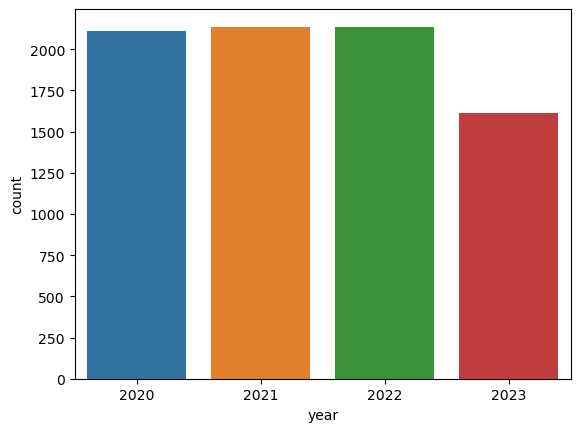

In [42]:
sns.countplot(x=df['year'])

<Axes: xlabel='month', ylabel='count'>

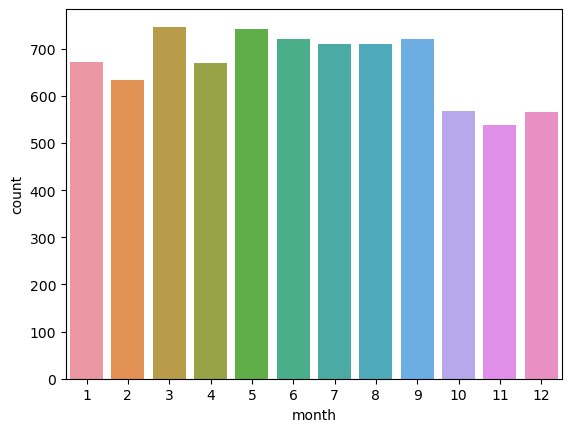

In [43]:
sns.countplot(x=df['month'])

<Axes: xlabel='day', ylabel='count'>

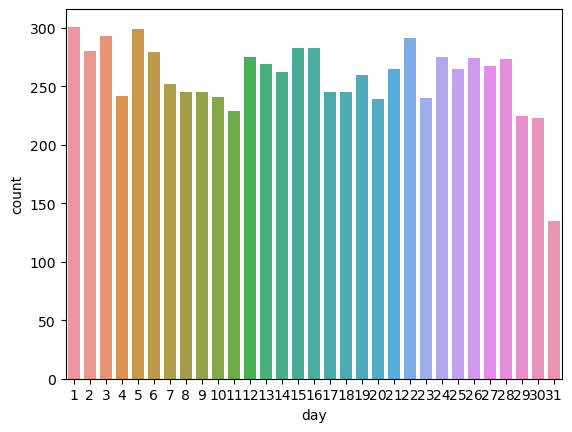

In [44]:
sns.countplot(x=df['day'])

<Axes: xlabel='hour', ylabel='count'>

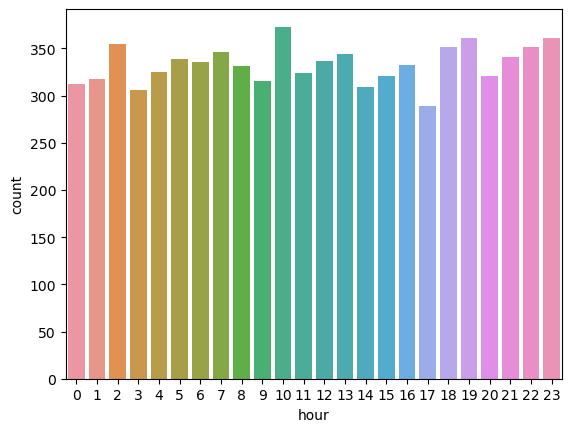

In [45]:
sns.countplot(x=df['hour'])

In [46]:
#on average basis how much transaction is happening with respect to currency
df.groupby('Transaction Currency')['Transaction Amount'].mean()

Transaction Currency
EUR    2498.701033
INR    2475.684095
USD    2515.217093
Name: Transaction Amount, dtype: float64

In [47]:
df.groupby('Card Type')['Transaction Amount'].mean()

Card Type
American Express    2517.011600
MasterCard          2453.969537
Visa                2517.806592
Name: Transaction Amount, dtype: float64

In [48]:
df.groupby('Device Information')['Transaction Amount'].mean()

Device Information
Desktop    2471.477107
Mobile     2495.895896
Tablet     2522.409093
Name: Transaction Amount, dtype: float64

In [49]:
df.groupby('year')['Transaction Amount'].mean()

year
2020    2465.059309
2021    2523.087000
2022    2493.990497
2023    2505.077567
Name: Transaction Amount, dtype: float64

In [50]:
df.groupby('month')['Transaction Amount'].mean()

month
1     2417.896563
2     2502.651798
3     2491.861098
4     2582.557045
5     2492.430969
6     2500.161914
7     2566.260915
8     2459.274437
9     2539.152205
10    2539.006538
11    2505.022677
12    2339.572372
Name: Transaction Amount, dtype: float64

In [51]:
df.groupby('day')['Transaction Amount'].mean()

day
1     2687.810000
2     2506.970321
3     2325.466724
4     2650.669174
5     2359.891605
6     2591.995018
7     2538.744405
8     2369.974163
9     2459.205469
10    2565.305768
11    2460.642402
12    2485.066618
13    2609.052007
14    2527.444008
15    2403.104735
16    2616.152650
17    2427.800980
18    2448.116653
19    2484.066692
20    2537.759372
21    2648.616264
22    2465.119038
23    2446.597250
24    2435.587636
25    2232.056226
26    2525.231131
27    2533.310562
28    2650.657363
29    2475.145956
30    2477.687623
31    2368.242148
Name: Transaction Amount, dtype: float64

In [52]:
df.groupby('hour')['Transaction Amount'].mean()

hour
0     2623.441154
1     2509.442013
2     2434.889662
3     2473.364837
4     2474.013323
5     2411.098289
6     2455.848363
7     2512.520549
8     2529.564139
9     2373.257111
10    2522.375362
11    2389.358179
12    2656.405074
13    2542.832907
14    2446.031553
15    2536.344112
16    2483.882892
17    2493.012734
18    2590.447983
19    2550.442770
20    2405.222523
21    2400.586481
22    2513.467216
23    2560.375568
Name: Transaction Amount, dtype: float64

In [53]:
df.groupby(['year','Card Type'])['Transaction Amount'].mean().reset_index(name='mean')

,year,Card Type,mean
0,2020,American Express,2473.090243
1,2020,MasterCard,2366.499472
2,2020,Visa,2554.189593
3,2021,American Express,2515.543780
4,2021,MasterCard,2443.501094
5,2021,Visa,2606.839683
6,2022,American Express,2539.645579
7,2022,MasterCard,2493.929727
8,2022,Visa,2447.497107
9,2023,American Express,2546.701445


In [55]:
#separating the target and feature
features=df.drop(['Fraud Flag or Label'],axis=1)
features

,Transaction Amount,Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Transaction Response Code,Previous Transactions,Transaction Source,Device Information,year,month,day,weekday,hour
0,285.88,Khammam,INR,MasterCard,5,0,0,Tablet,2022,9,24,5,13
1,1777.32,Vasai-Virar,EUR,American Express,12,0,0,Mobile,2020,7,24,4,11
2,3939.01,Nangloi Jat,USD,Visa,5,3,1,Mobile,2023,3,18,5,1
3,376.44,Ramagundam,USD,Visa,5,2,1,Tablet,2021,1,7,3,21
4,1687.33,Adoni,INR,MasterCard,5,2,0,Desktop,2021,12,16,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2214.15,Anantapuram,EUR,Visa,5,1,0,Mobile,2020,12,17,3,20
7996,675.97,Guntakal,INR,Visa,0,3,1,Tablet,2022,7,4,0,5
7997,918.28,Udupi,USD,MasterCard,5,3,1,Tablet,2022,8,14,6,19
7998,3035.31,Sultan Pur Majra,EUR,American Express,0,1,1,Tablet,2021,5,16,6,18


In [56]:
Target=df['Fraud Flag or Label']
Target

0       1
1       1
2       1
3       0
4       1
       ..
7995    0
7996    1
7997    1
7998    1
7999    0
Name: Fraud Flag or Label, Length: 8000, dtype: int64

In [59]:
features.drop('Transaction Location (City or ZIP Code)',axis=1,inplace=True)

In [60]:
features

,Transaction Amount,Transaction Currency,Card Type,Transaction Response Code,Previous Transactions,Transaction Source,Device Information,year,month,day,weekday,hour
0,285.88,INR,MasterCard,5,0,0,Tablet,2022,9,24,5,13
1,1777.32,EUR,American Express,12,0,0,Mobile,2020,7,24,4,11
2,3939.01,USD,Visa,5,3,1,Mobile,2023,3,18,5,1
3,376.44,USD,Visa,5,2,1,Tablet,2021,1,7,3,21
4,1687.33,INR,MasterCard,5,2,0,Desktop,2021,12,16,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2214.15,EUR,Visa,5,1,0,Mobile,2020,12,17,3,20
7996,675.97,INR,Visa,0,3,1,Tablet,2022,7,4,0,5
7997,918.28,USD,MasterCard,5,3,1,Tablet,2022,8,14,6,19
7998,3035.31,EUR,American Express,0,1,1,Tablet,2021,5,16,6,18


In [61]:
#categorical encoding
#we have performed one hot encoder,which is used to encode the given data
#we have used column transformer function to transform the data into respective column after applying
#one hot encoder,this column transformer function is helping us to apply one hot encoder on respective columns only
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,6])],remainder='passthrough')
features_new=ct.fit_transform(features)

In [62]:
features_new.shape

(8000, 18)

In [63]:
features_new

array([[0.0, 1.0, 0.0, ..., 24, 5, 13],
       [1.0, 0.0, 0.0, ..., 24, 4, 11],
       [0.0, 0.0, 1.0, ..., 18, 5, 1],
       ...,
       [0.0, 0.0, 1.0, ..., 14, 6, 19],
       [1.0, 0.0, 0.0, ..., 16, 6, 18],
       [0.0, 1.0, 0.0, ..., 14, 2, 6]], dtype=object)

In [64]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
final_features=ss.fit_transform(features_new)

In [65]:
final_features

array([[-0.70220683,  1.39598181, -0.70280218, ...,  0.95548428,
         1.00322668,  0.20071676],
       [ 1.42408184, -0.71634171, -0.70280218, ...,  0.95548428,
         0.50404684, -0.08759172],
       [-0.70220683, -0.71634171,  1.42287549, ...,  0.27746519,
         1.00322668, -1.52913409],
       ...,
       [-0.70220683, -0.71634171,  1.42287549, ..., -0.17454754,
         1.50240652,  1.06564218],
       [ 1.42408184, -0.71634171, -0.70280218, ...,  0.05145882,
         1.50240652,  0.92148794],
       [-0.70220683,  1.39598181, -0.70280218, ..., -0.17454754,
        -0.49431284, -0.8083629 ]])

In [66]:
#spliting the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(final_features,Target,test_size=0.2)

In [ ]:
#apply logestic regression

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [69]:
Y_predict=lr.predict(X_test)
Y_predict

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,Y_predict))

[[440 355]
 [425 380]]


In [72]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53       795
           1       0.52      0.47      0.49       805

    accuracy                           0.51      1600
   macro avg       0.51      0.51      0.51      1600
weighted avg       0.51      0.51      0.51      1600



In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,Y_train,cv=5)

array([0.50546875, 0.4875    , 0.4921875 , 0.50703125, 0.5109375 ])

In [74]:
cross_val_score(lr,X_test,Y_test,cv=5)

array([0.503125, 0.54375 , 0.490625, 0.5     , 0.475   ])